In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full (2).csv


In [3]:
bank = pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Understanding the Data

In [4]:
bank.shape

(45211, 17)

In [5]:
bank['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [6]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [9]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [10]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
bank['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [12]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [14]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [15]:
bank['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [16]:
bank['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [17]:
bank['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

EDA

In [18]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


changing categorical value into numerical Value

In [21]:
bank1 = pd.get_dummies(bank,columns=['job', 'marital', 'default', 'housing', 'loan', 'education', 'contact', 'poutcome','month'])
bank1['y'] = bank1['y'].replace('yes',1)
bank1['y'] = bank1['y'].replace('no',0)

In [22]:
bank1.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
bank1['job_admin.'].value_counts()

0    40040
1     5171
Name: job_admin., dtype: int64

In [24]:
bank1['job_blue-collar'].value_counts()

0    35479
1     9732
Name: job_blue-collar, dtype: int64

In [25]:
bank1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [26]:
bank1.drop(columns='default_no',inplace=True)
bank1.drop(columns='housing_no',inplace=True)
bank1.drop(columns='loan_no',inplace=True)

bank1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_yes', 'housing_yes', 'loan_yes', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [27]:
#changing column names
bank1 = bank1.rename({'job_admin.':'admin'},axis=1)
bank1 = bank1.rename({'job_blue-collar':'blue collar'},axis=1)
bank1 = bank1.rename({'job_entrepreneurr':'entrepreneur'},axis=1)
bank1 = bank1.rename({'job_services':'services'},axis=1)
bank1 = bank1.rename({'job_student':'student'},axis=1)
bank1 = bank1.rename({'job_technician':'technician'},axis=1)
bank1 = bank1.rename({'job_unemployed':'employed'},axis=1)
bank1 = bank1.rename({'job_unknown':'unknown'},axis=1)
bank1 = bank1.rename({'marital_divorced':'divorced'},axis=1)
bank1 = bank1.rename({'marital_married':'married'},axis=1)
bank1 = bank1.rename({'marital_single':'single'},axis=1)
bank1 = bank1.rename({'default_yes':'default'},axis=1)
bank1 = bank1.rename({'housing_yes':'housing'},axis=1)
bank1 = bank1.rename({'loan_yes':'loan'},axis=1)
bank1 = bank1.rename({'contact_cellular':'cellular'},axis=1)
bank1 = bank1.rename({'contact_telephone':'telephone'},axis=1)

In [28]:
bank1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'admin', 'blue collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'services',
       'student', 'technician', 'employed', 'unknown', 'divorced', 'married',
       'single', 'default', 'housing', 'loan', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'cellular', 'telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [29]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   admin                45211 non-null  uint8
 9   blue collar          45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  services             45211 non-null  uint8
 16  student              4

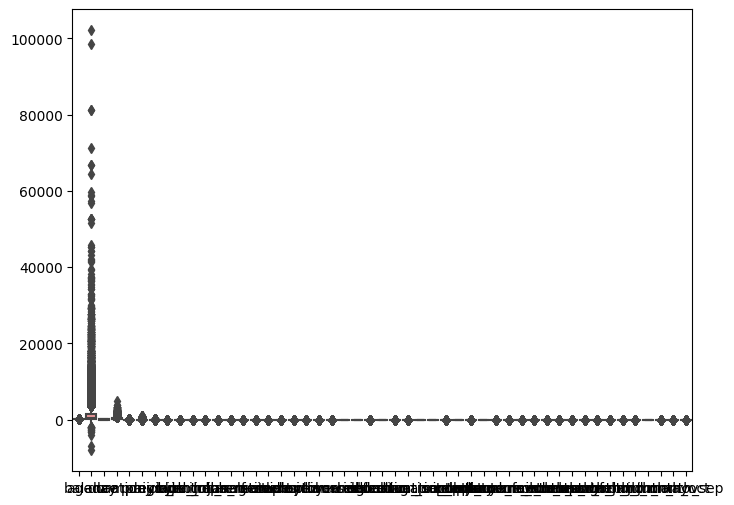

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=bank1, orient='v')

plt.show()

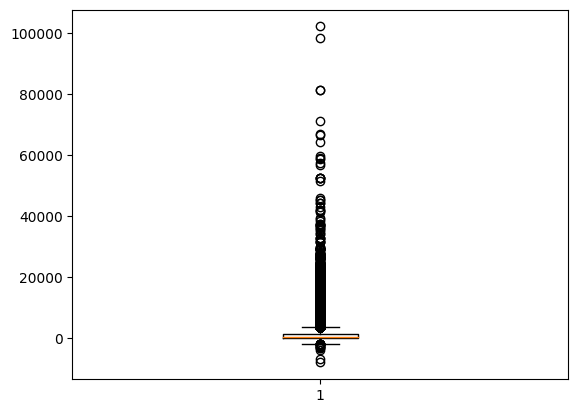

In [31]:
plt.boxplot(bank1['balance'])
plt.show()

In [32]:
bank1['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

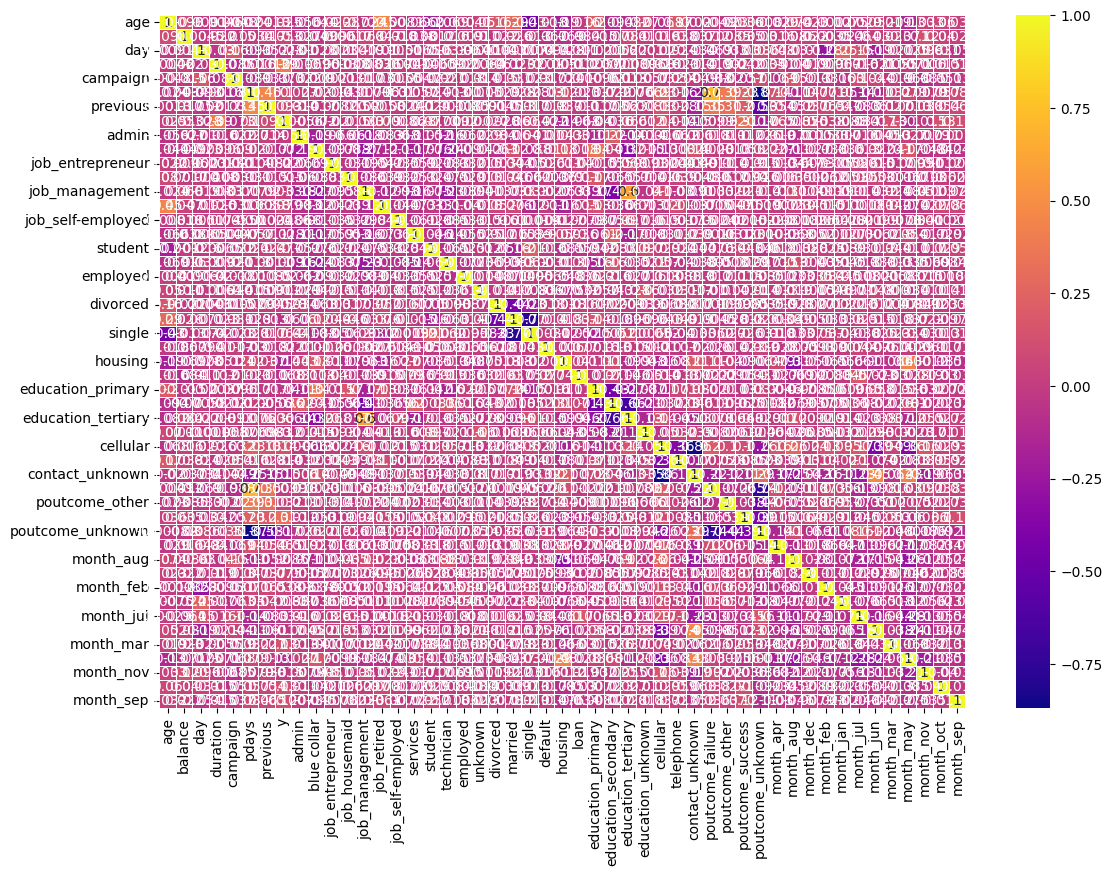

In [33]:
correlation_matrix = bank1.corr()
plt.figure(figsize=(13,9))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma',linewidths=0.5)
plt.show()

In [34]:
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,y,admin,blue collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,-0.055717,-0.044002,...,0.022872,-0.001198,-0.007466,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838,-0.026726,-0.048757,...,0.021594,-0.003537,-0.024421,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,-0.010455,-0.022898,...,-0.011368,-0.283326,0.250523,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521,-0.015722,0.009637,...,0.019057,-0.009557,0.006989,0.016163,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,-0.021868,0.008986,...,-0.012635,-0.030747,-0.063064,0.104148,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621,0.027497,0.020063,...,0.047236,0.071023,0.049509,-0.136274,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236,0.014245,-0.017095,...,0.036628,0.065243,0.047004,-0.082943,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000,0.005637,-0.072083,...,0.075164,0.038417,-0.008783,-0.034382,-0.016805,0.129456,-0.102500,-0.014937,0.128531,0.123185
admin,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,0.005637,1.000000,-0.188216,...,-0.001495,0.003261,0.007026,0.015926,-0.004495,0.013225,0.026657,-0.007874,0.011293,0.007279
blue collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.072083,-0.188216,1.000000,...,-0.026710,-0.038316,-0.036313,-0.013203,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816


In [35]:
bank_corr = bank1[['balance','y']]
bank_corr.corr()

,balance,y
balance,1.000000,0.052838
y,0.052838,1.000000


In [36]:
bank2 = bank1.drop(columns='balance')

Lets build an model if doesnt fit well we will preprocess again to get the good fit

In [37]:
X = bank1.drop(columns='y')
y = bank1['y']
X.head()

,age,balance,day,duration,campaign,pdays,previous,admin,blue collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33908, 48), (11303, 48), (33908,), (11303,))

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Applying Logistic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 1, 0, ..., 0, 0, 1])

In [43]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

[[9702  276]
 [ 848  477]]


In [45]:
model.score(X_train, y_train)

0.902766308835673

In [46]:
model.score(X_test, y_test)

0.9005573741484562

In [47]:
(9705+474)/(9705+474+851+273)

0.9005573741484562

In [48]:
y_train

33362    0
28229    0
37952    0
43408    1
9897     0
        ..
30403    0
21243    0
42613    1
43567    0
2732     0
Name: y, Length: 33908, dtype: int64

In [49]:
y_pred_df = pd.DataFrame({'actual': y_train,
                          'predicted_prob': model.predict(X_train)})
y_pred_df

,actual,predicted_prob
33362,0,0
28229,0,0
37952,0,0
43408,1,0
9897,0,0
...,...,...
30403,0,0
21243,0,0
42613,1,0
43567,0,0


In [50]:
model.predict_proba(X_train)[:,1]

array([0.04183981, 0.02116663, 0.06249955, ..., 0.06267398, 0.16450616,
       0.00808736])

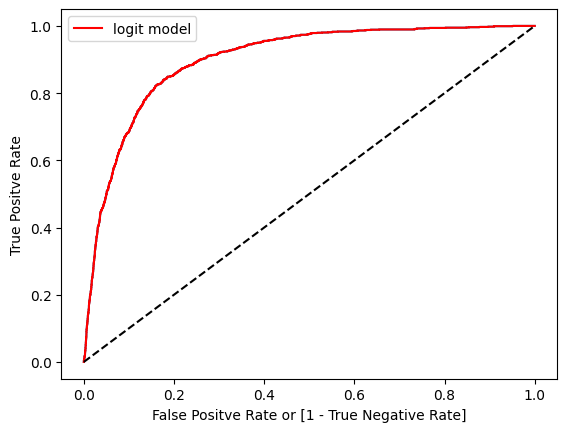

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, tresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred_test)

plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positve Rate or [1 - True Negative Rate]')
plt.ylabel('True Positve Rate')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9978
           1       0.63      0.36      0.46      1325

    accuracy                           0.90     11303
   macro avg       0.78      0.67      0.70     11303
weighted avg       0.89      0.90      0.89     11303

